In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('data/all_stocks_5yr.csv', parse_dates=True)

In [82]:
df.shape

(619040, 7)

In [83]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [84]:
sbux = df[df['Name'] == 'SBUX'].copy()
sbux.head()


,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


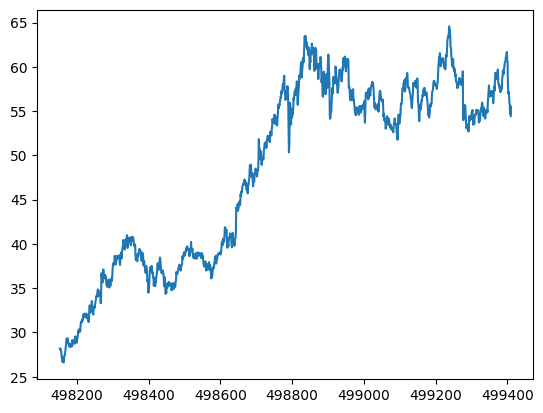

In [85]:
sbux['close'].plot();

In [86]:
sbux['prev_close'] = sbux['close'].shift(1)

In [87]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [88]:
sbux['return'] = (sbux['close'] / sbux['prev_close']) - 1

In [89]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [90]:
sbux['return2'] = sbux['close'].pct_change(1)

In [91]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


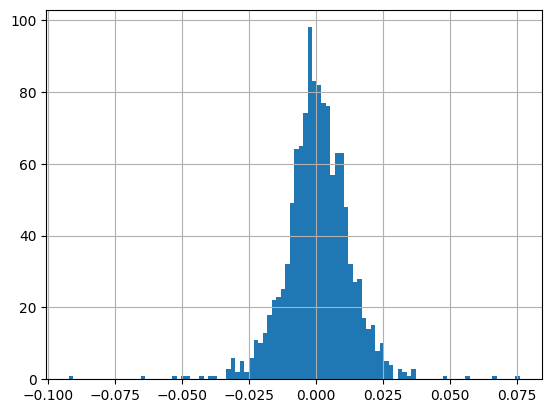

In [92]:
sbux['return'].hist(bins=100);

In [93]:

sbux['return'].mean(), sbux['return'].std()

(0.0006002332205830914, 0.012360934026133879)

In [94]:
sbux['log_return'] = np.log(sbux['return'] + 1)

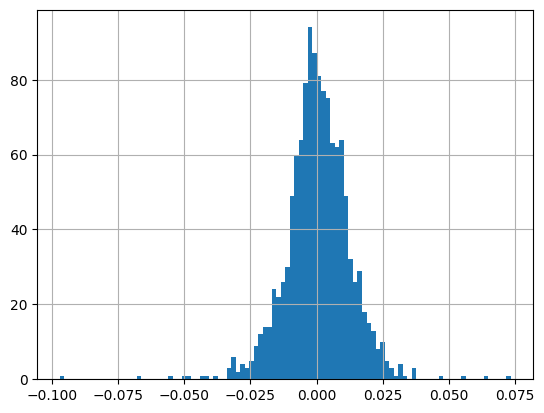

In [95]:
sbux['log_return'].hist(bins=100);

In [96]:
sbux['log_return'].mean(), sbux['log_return'].std()

(0.0005235902748108682, 0.012381234216101258)

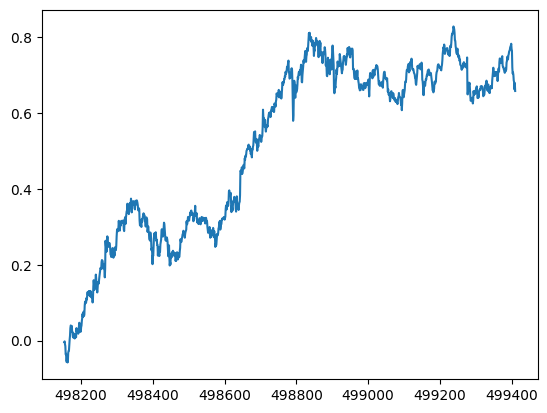

In [97]:
sbux['log_return'].cumsum().plot();

In [98]:
## QQ Plot

In [99]:
from scipy.stats import norm

In [100]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100)

In [101]:
y_list = norm.pdf(x_list, loc=sbux['return'].mean(), scale=sbux['return'].std())

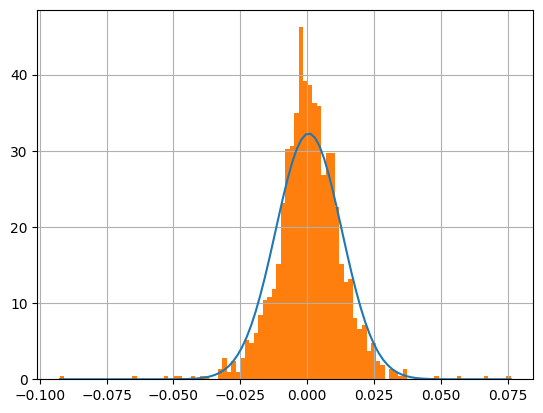

In [102]:
plt.plot(x_list, y_list);
sbux['return'].hist(bins=100, density=True);

In [103]:
from scipy.stats import probplot


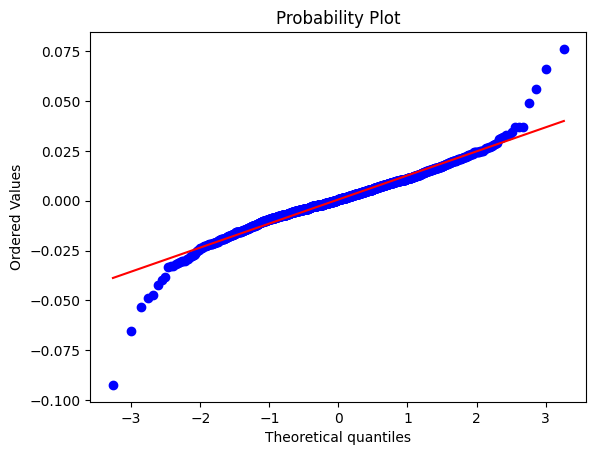

In [104]:
probplot(sbux['return'].dropna(), dist='norm', fit=True, plot=plt);

In [105]:
import statsmodels.api as sm

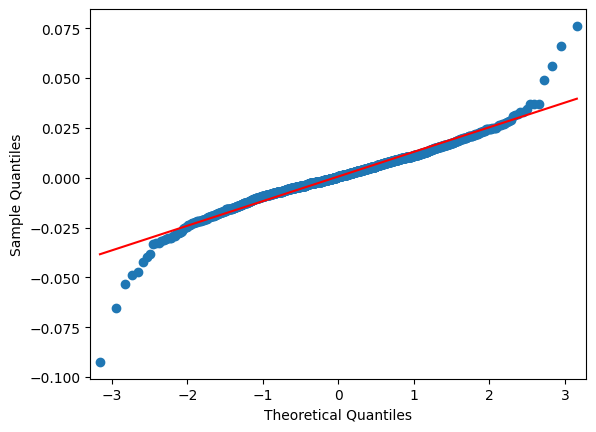

In [106]:
sm.qqplot(sbux['return'].dropna(), line='s');

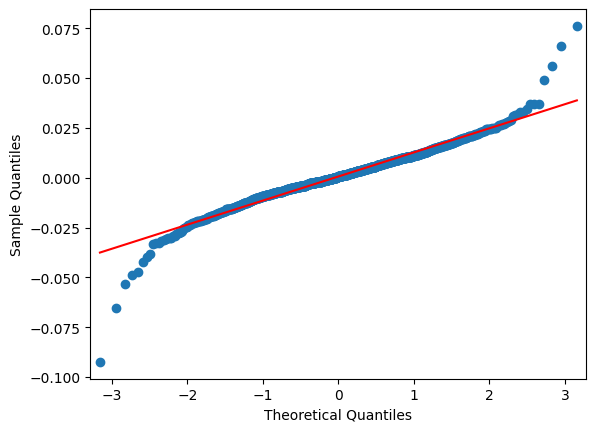

In [107]:
sm.qqplot(sbux['return'].dropna(), line='r');

In [108]:
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100)

In [109]:
y_list = norm.pdf(x_list,
                  loc=sbux['log_return'].mean(),
                  scale=sbux['log_return'].std())

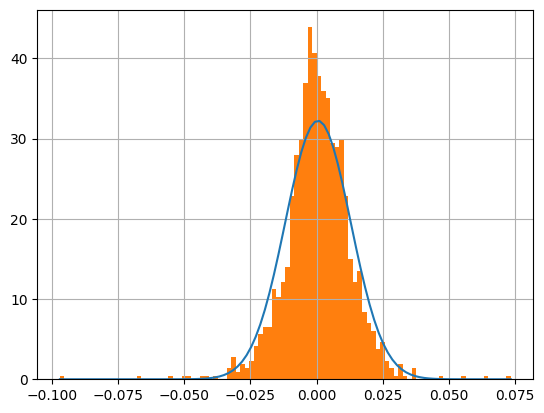

In [110]:
plt.plot(x_list, y_list);
sbux['log_return'].hist(bins=100, density=True);


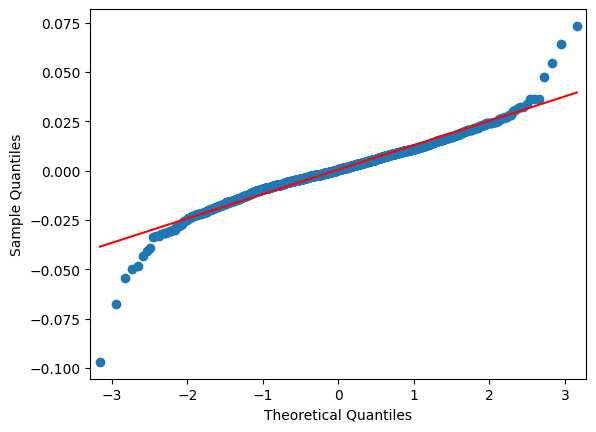

In [111]:
sm.qqplot(sbux['log_return'].dropna(), line='s');

In [112]:
## The t-distribution

In [113]:
from scipy.stats import t # careful!

In [114]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100)

In [115]:
params = t.fit(sbux['return'].dropna())

In [116]:
params

(4.78753221828017, 0.0007108616716254146, 0.009341981642040986)

In [117]:
df, loc, scale = params

In [118]:
y_list = t.pdf(x_list, df, loc, scale)

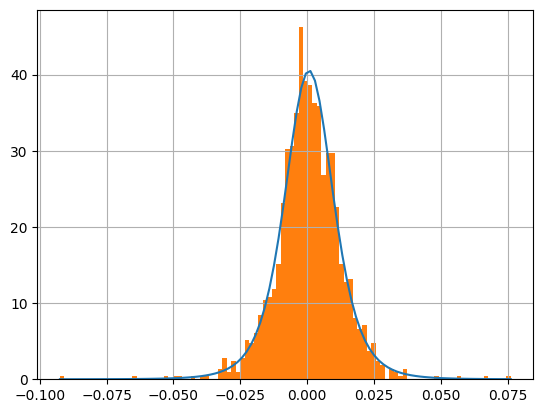

In [119]:
plt.plot(x_list, y_list);
sbux['return'].hist(bins=100, density=True);

In [120]:
# sm.qqplot(sbux['return'].dropna(), dist=t, line='s'); #vai retornar erro

In [121]:
# probplot(sbux['return'].dropna(), dist='t', fit=True, plot=plt); # vai retornar erro

In [122]:
class myt:
  def __init__(self, df):
    self.df = df

  def fit(self, x):
    return t.fit(x)

  def ppf(self, x, loc=0, scale=1):
    return t.ppf(x, self.df, loc, scale)

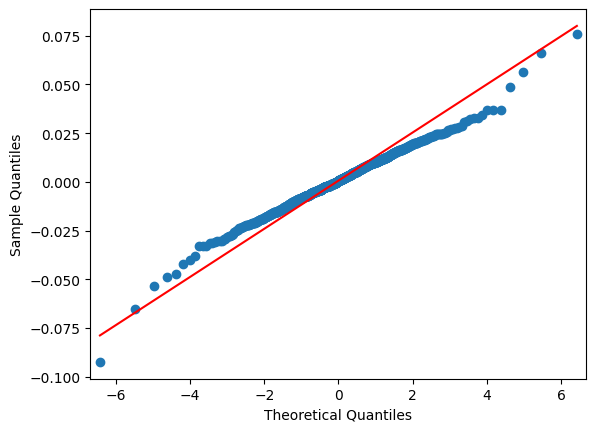

In [123]:
sm.qqplot(sbux['return'].dropna(), dist=myt(df), line='s');

In [124]:
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100)

In [125]:
params = t.fit(sbux['log_return'].dropna())
params

(4.75336721921499, 0.0006969522085244113, 0.009324468516575219)

In [126]:
df, loc, scale = params

In [127]:
y_list = t.pdf(x_list, df, loc, scale)

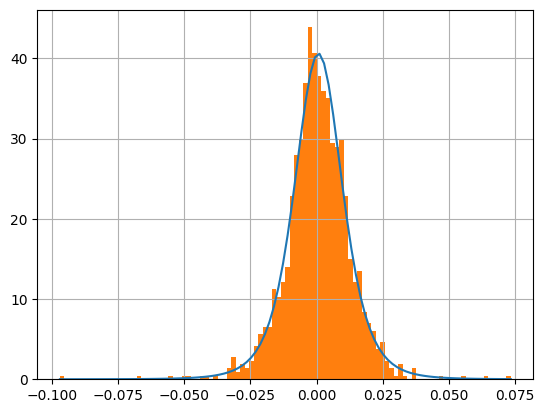

In [128]:
plt.plot(x_list, y_list);
sbux['log_return'].hist(bins=100, density=True);

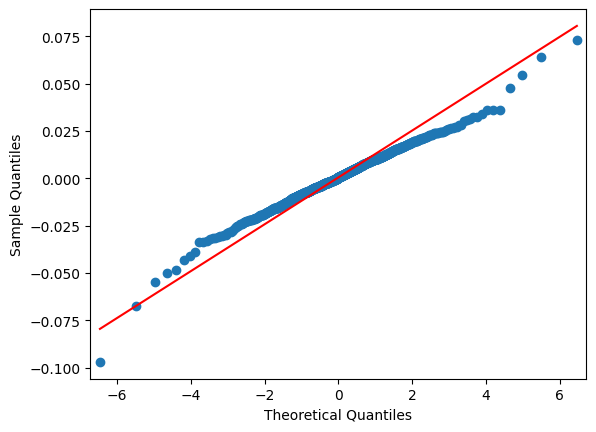

In [129]:
sm.qqplot(sbux['log_return'].dropna(), dist=myt(df), line='s');

In [130]:
## Skewness e Kurtosis

In [131]:
sbux['return'].skew()

-0.2680784195824153

In [132]:
sbux['return'].kurtosis()

5.593158903424731

In [133]:
sbux['log_return'].skew()

-0.41015501490182066

In [134]:
sbux['log_return'].kurtosis()

5.964502225799283

In [135]:
samp = pd.Series(np.random.randn(10000))
samp.skew(), samp.kurtosis()

(-0.0058205204245404514, 0.04100496300995049)

In [136]:
## Confidence Interval

In [137]:
values = sbux['return'].dropna().to_numpy()

In [138]:
m = values.mean()
s = values.std(ddof=1)

In [139]:
low = m - 1.96 * s / np.sqrt(len(values))
high = m + 1.96 * s / np.sqrt(len(values))

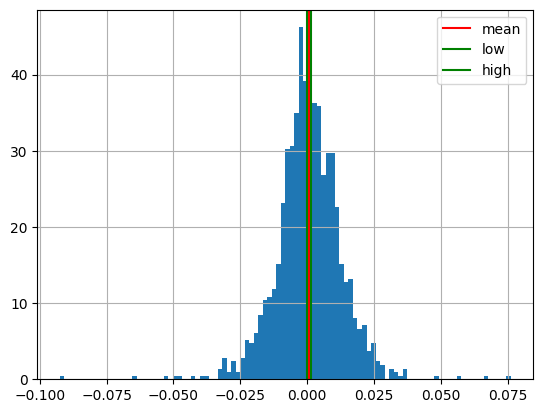

In [140]:
sbux['return'].hist(bins=100, density=True);
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.legend();

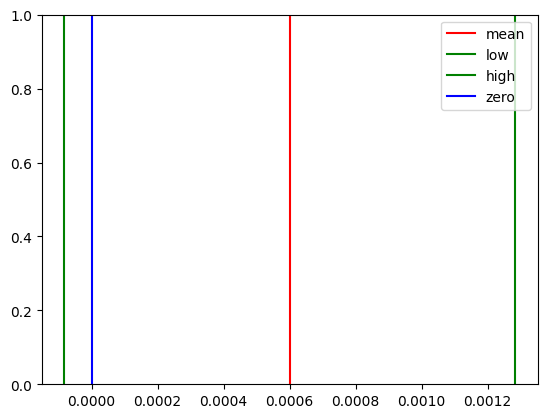

In [141]:
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.axvline(0, label='zero', color='blue');
plt.legend();

In [142]:
## Stat tests

In [143]:
from scipy.stats import jarque_bera, normaltest

In [144]:
jarque_bera(values)

SignificanceResult(statistic=1639.028438655224, pvalue=0.0)

In [145]:
normaltest(values)

NormaltestResult(statistic=172.6819672061636, pvalue=3.1811727900119636e-38)

In [146]:
jarque_bera(sbux['log_return'].dropna())

SignificanceResult(statistic=1882.1814629047703, pvalue=0.0)

In [147]:
normaltest(sbux['log_return'].dropna())

NormaltestResult(statistic=198.54738937007733, pvalue=7.690989175882069e-44)

In [148]:
from scipy.stats import kstest

In [149]:
df, loc, scale = t.fit(values)
def cdf(x):
  return t.cdf(x, df, loc, scale)

kstest(values, cdf)

KstestResult(statistic=0.01887566203844726, pvalue=0.7537785475444063, statistic_location=-0.0003257859586252021, statistic_sign=1)

In [150]:
from scipy.stats import ttest_1samp

In [151]:
ttest_1samp(values, 0)

TtestResult(statistic=1.7223010261810556, pvalue=0.08526098717694539, df=1257)

In [152]:
ttest_1samp(sbux['log_return'].dropna(), 0)

TtestResult(statistic=1.4999195047533647, pvalue=0.13388636615667787, df=1257)

In [155]:
data = df = pd.read_csv('data/all_stocks_5yr.csv', parse_dates=True)

In [156]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [157]:
mmm = data[data['Name'] == 'MMM'].copy()

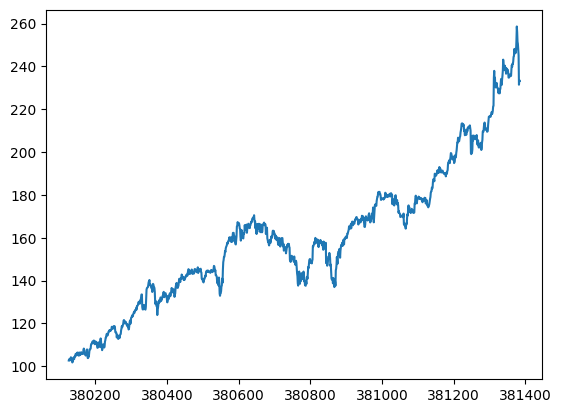

In [158]:
mmm['close'].plot();

In [159]:
mmm['prev_close'] = mmm['close'].shift(1)
mmm['return'] = mmm['close'] / mmm['prev_close'] - 1
mmm['log_return'] = np.log(mmm['return'] + 1)

In [160]:
mmm['return'].mean(), mmm['return'].std()

(0.0007001182500580143, 0.009768718404053094)

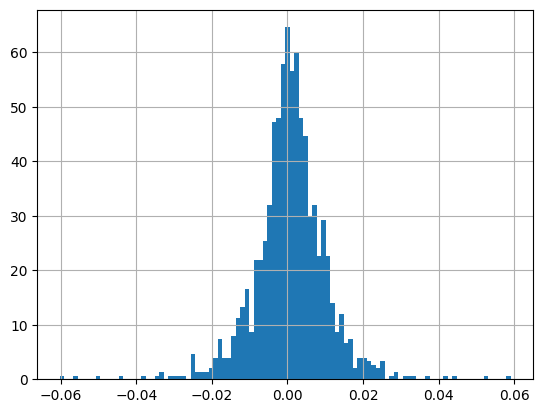

In [161]:
mmm['return'].hist(bins=100, density=True);

In [162]:
m = mmm['return'].mean()
s = mmm['return'].std(ddof=1)
low = m - 1.96 * s / np.sqrt(len(mmm['return']))
high = m + 1.96 * s / np.sqrt(len(mmm['return']))
print(low, high, m, s)

0.0001605072466054154 0.0012397292535106133 0.0007001182500580143 0.009768718404053094


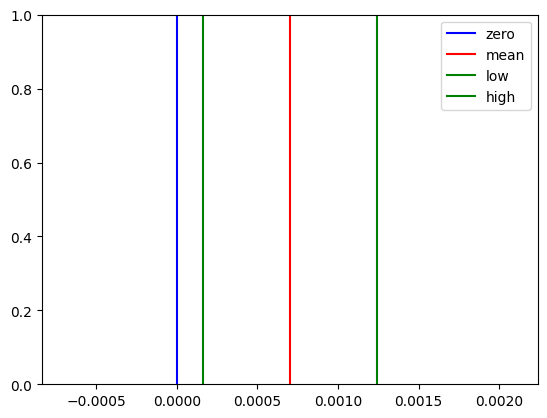

In [163]:
plt.xlim((low - 0.001, high + 0.001))
plt.axvline(0, label='zero', color='blue');
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.legend()

In [164]:
ttest_1samp(mmm['return'].dropna(), 0)

TtestResult(statistic=2.541991701703365, pvalue=0.011141496531324398, df=1257)

In [165]:
ttest_1samp(mmm['log_return'].dropna(), 0)

TtestResult(statistic=2.365963115873947, pvalue=0.018134246809755054, df=1257)